In [1]:
import graphlab as gl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import random
import pickle
from itertools import combinations

##Loading in the data

In [86]:
model = gl.recommender.ranking_factorization_recommender
data_set = 'star5'
item_features = ['location', 'rating','type']

#Data with 'Climb', 'User', and 'rating'
df_data = pd.read_csv(data_set+'.csv')
sf_data = gl.SFrame(df_data)

with open('df_raw_'+data_set+'.p','r') as f:
    df_raw = pickle.load(f)
df_obs = df_raw[item_features].reset_index()
sf_obs = gl.SFrame(df_obs)



##Current Working Model

In [185]:
reg_w = 5e-5
num_fac_w = 15
df_ob_w = pd.concat( (df_obs.Climb, df_obs[['rating', 'location', 'type']]) , axis=1)
sf_ob_w = gl.SFrame(df_ob_w)
            
m_working = model.create(sf_data, 'User', 'Climb', 'rating', 
            item_data = sf_ob_w,
            verbose = False,
            regularization = 1e-4,
            num_factors = 4)
print 'MSE:', m_plain.evaluate_rmse(test_set, 'rating')['rmse_overall']

PROGRESS: Recsys training: model = ranking_factorization_recommender
MSE: 0.607899021578


In [188]:
m_working.recommend(users=[107953067],k=20).print_rows(num_rows=30)

+-----------+-----------+---------------+------+
|    User   |   Climb   |     score     | rank |
+-----------+-----------+---------------+------+
| 107953067 | 105862915 | 4.83046371556 |  1   |
| 107953067 | 105924807 | 4.73811882663 |  2   |
| 107953067 | 105912416 | 4.62310303654 |  3   |
| 107953067 | 105732392 | 4.62162629016 |  4   |
| 107953067 | 105725101 | 4.62042598916 |  5   |
| 107953067 | 105874465 | 4.56603377243 |  6   |
| 107953067 | 105870727 | 4.54757006956 |  7   |
| 107953067 | 105732254 | 4.52155988501 |  8   |
| 107953067 | 105725122 | 4.48357468775 |  9   |
| 107953067 | 105721816 | 4.47507575889 |  10  |
| 107953067 | 105863822 | 4.46872290768 |  11  |
| 107953067 | 105862944 | 4.45333473768 |  12  |
| 107953067 | 105920684 | 4.44729621884 |  13  |
| 107953067 | 105721792 |  4.4211954095 |  14  |
| 107953067 | 105732386 | 4.41902032774 |  15  |
| 107953067 | 105840692 | 4.40886931558 |  16  |
| 107953067 | 105732410 | 4.40368195051 |  17  |
| 107953067 | 105945

##Plain recommender

In [90]:
model_plain = gl.recommender

(train_set, test_set) = sf_data.random_split(0.8)
m_plain = model_plain.create(train_set, 'User', 'Climb', 'rating', 
            item_data = sf_obs,
            verbose = False)

PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 258162 observations with 7560 users and 13675 items.
PROGRESS:     Data prepared in: 0.099936s
PROGRESS: Training ranking_factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 32       |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 1e-09    |
PROGRESS: | solver                         | Solver used for training                         | adagrad  |
PROGRESS: | linear_regularization          | L2 Regularization on L

In [91]:
m_plain.evaluate_rmse(test_set, 'rating')['rmse_overall']

1.2387839716493434

##Item similarity 

If one needs to compare the ratings of items, Cosine and Pearson similarity are recommended.

In [189]:
(train_set, test_set) = sf_data.random_split(0.8)

In [194]:
sim_mod = gl.recommender.item_similarity_recommender.create(sf_data,
                                        user_id = 'User',
                                        item_id = 'Climb',
                                        item_data = sf_obs)

PROGRESS: Recsys training: model = item_similarity
PROGRESS: Warning: Column 'rating' ignored.
PROGRESS:     To use this column as the target, set target = "rating" and use a method that allows the use of a target.
PROGRESS: Preparing data set.
PROGRESS:     Data has 322247 observations with 7560 users and 13675 items.
PROGRESS:     Data prepared in: 0.149643s
PROGRESS: Computing item similarity statistics:
PROGRESS: Computing most similar items for 13675 items:
PROGRESS: +-----------------+-----------------+
PROGRESS: | Number of items | Elapsed Time    |
PROGRESS: +-----------------+-----------------+
PROGRESS: | 1000            | 0.750075        |
PROGRESS: | 2000            | 0.778177        |
PROGRESS: | 3000            | 0.805869        |
PROGRESS: | 4000            | 0.833419        |
PROGRESS: | 5000            | 0.860615        |
PROGRESS: | 6000            | 0.887213        |
PROGRESS: | 7000            | 0.913434        |
PROGRESS: | 8000            | 0.939662        |
PROGR

In [195]:
sf_rec = sim_mod.get_similar_items(k=100)[:100]#.print_rows(num_rows=5)

PROGRESS: Getting similar items completed in 0.186527


In [196]:
sim_mod.recommend(users=[107953067],k=20).print_rows(num_rows=30)

+-----------+-----------+-----------------+------+
|    User   |   Climb   |      score      | rank |
+-----------+-----------+-----------------+------+
| 107953067 | 105801570 | 0.0731707317073 |  1   |
| 107953067 | 105811601 | 0.0665869218501 |  2   |
| 107953067 | 105934896 | 0.0632716049383 |  3   |
| 107953067 | 105732605 | 0.0568839672074 |  4   |
| 107953067 | 105806583 |    0.0546875    |  5   |
| 107953067 | 105732941 | 0.0542401167401 |  6   |
| 107953067 | 105932269 | 0.0540963101939 |  7   |
| 107953067 | 105732728 | 0.0536758563074 |  8   |
| 107953067 | 105799128 | 0.0525793650794 |  9   |
| 107953067 | 105732362 | 0.0524282675333 |  10  |
| 107953067 | 105799095 | 0.0522682445759 |  11  |
| 107953067 | 105897523 | 0.0518341307815 |  12  |
| 107953067 | 105732614 | 0.0516213915332 |  13  |
| 107953067 | 105732881 | 0.0512677561136 |  14  |
| 107953067 | 105799568 | 0.0496254681648 |  15  |
| 107953067 | 105821465 | 0.0492831541219 |  16  |
| 107953067 | 105829283 | 0.049

In [ ]:
#find new area


##Ranking Factorization Recommender

In [166]:
def regularization_search(model, n=5, k=4):
    
    reg_vals = np.logspace(-3,-5,k)

    mse_test_reg = []
    mse_train_reg = []
    m_reg = []
    # train_set = sf_data
    # test_set=sf_data
    for i in range(n):
        (train_set, test_set) = sf_data.random_split(0.8)
        m_reg += [model.create(train_set, 
                               'User', 
                               'Climb', 
                               'rating',
                               item_data = sf_ob_w,
                               num_factors=num_fac_w,
                               regularization = r,
                               verbose=False)
                  for r in reg_vals]
        mse_test_reg += [mod.evaluate_rmse(test_set, 'rating')['rmse_overall']
                      for mod in m_reg[i*k:]]
        mse_train_reg += [mod.evaluate_rmse(train_set, 'rating')['rmse_overall']
                      for mod in m_reg[i*k:]]
    return m_reg, mse_test_reg, mse_train_reg, reg_vals, n

In [173]:
models_reg, mse_test_reg, mse_train_reg, reg_vals, n_reg = regularization_search(model, n =3, k=15)

PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model =

[  1.00000000e-03   7.19685673e-04   5.17947468e-04   3.72759372e-04
   2.68269580e-04   1.93069773e-04   1.38949549e-04   1.00000000e-04
   7.19685673e-05   5.17947468e-05   3.72759372e-05   2.68269580e-05
   1.93069773e-05   1.38949549e-05   1.00000000e-05]


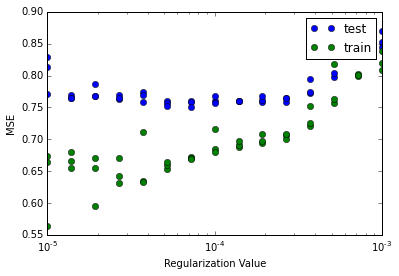

In [174]:
fig, ax = plt.subplots(1)
ax.semilogx(list(reg_vals)*n_reg, mse_test_reg, 'o', label='test', alpha=0.6)
ax.semilogx(list(reg_vals)*n_reg, mse_train_reg, 'o', label = 'train', alpha=0.6)
ax.set_ylabel('MSE')
ax.set_xlabel('Regularization Value')
ax.legend()
print reg_vals

###Latent Feature Selection

In [155]:
def latent_feature_search(model, n=2, k=7, reg=1e-4):
    num_factors = range(k)
    mse_test = []
    mse_train = []
    models = []
    # train_set = sf_data
    # test_set=sf_data
    for i in range(n):
        (train_set, test_set) = sf_data.random_split(0.8)
        models += [model.create(train_set, 
                              'User', 
                              'Climb', 
                              'rating',
                              item_data=sf_ob_w,
                              num_factors=num,
                              verbose=False,
                              regularization=reg_w)
                  for num in num_factors]
        mse_test += [mod.evaluate_rmse(test_set, 'rating')['rmse_overall']
                      for mod in models[i*k:]]
        mse_train += [mod.evaluate_rmse(train_set, 'rating')['rmse_overall']
                      for mod in models[i*k:]]
    return models, mse_test, mse_train, k, n

In [156]:
def comp_mse_plot(mse_test, mse_train, k, n, xlabel='', alpha=.6,
                  legend=True):
    fig, ax = plt.subplots(1)
    ax.plot(range(k)*n, mse_test, 'o', label='test', alpha=alpha)
    ax.plot(range(k)*n, mse_train, 'o', label = 'train', alpha=alpha)
    if legend:
        ax.legend()
    ax.set_ylabel('MSE')
    ax.set_xlabel(xlabel)
    

In [159]:
models_f, mse_test_f, mse_train_f, k_f, n_f = latent_feature_search(model, n=3, k=20)

PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model =

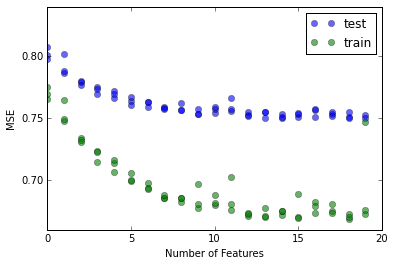

In [160]:
comp_mse_plot(mse_test_f, mse_train_f, k_f, n_f, xlabel='Number of Features')

##Observed Feature Selection

In [169]:
def obs_feature_search(item_features, model, n=3, 
                       num_factors=4,
                       reg=1e-4):
    m_ob = []
    mse_test_ob = []
    mse_train_ob = []
    feature_combos =[]
    for i in range(len(item_features)):
        feature_combos += list(combinations(item_features, i+1))
    k = len(feature_combos)

    for i in range(n):
        (train_set, test_set) = sf_data.random_split(0.8)

        #No observed item features for comparison
        m_ob += [model.create(train_set, 'User', 'Climb',
                             target='rating',
                             verbose = False,
                             regularization = reg,
                             num_factors = num_factors)]
        #Iterate through each observed item feature
        for combo in feature_combos:
            df_ob = pd.concat( (df_obs.Climb, df_obs[list(combo)]) , axis=1)
            sf_ob = gl.SFrame(df_ob)
            m_ob += [model.create(train_set, 'User', 'Climb',
                                target='rating',
                                item_data = sf_ob,
                                verbose = False,
                                regularization = reg_w,
                                num_factors = num_fac_w)]

        mse_test_ob += [mod.evaluate_rmse(test_set, 'rating')['rmse_overall']
                      for mod in m_ob[i*(k+1):]]
        mse_train_ob += [mod.evaluate_rmse(train_set, 'rating')['rmse_overall']
                      for mod in m_ob[i*(k+1):]]
    
    return (m_ob, mse_test_ob, mse_train_ob, n, k+1)

In [170]:
models_ob, mse_test_ob, mse_train_ob, n, k = obs_feature_search(item_features,
                                                     model=model,
                                                     n=3)

PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Recsys training: model =

In [171]:
feature_combos =[]
for i in range(len(item_features)):
    feature_combos += list(combinations(item_features, i+1))
feature_combos

[('location',),
 ('rating',),
 ('type',),
 ('location', 'rating'),
 ('location', 'type'),
 ('rating', 'type'),
 ('location', 'rating', 'type')]

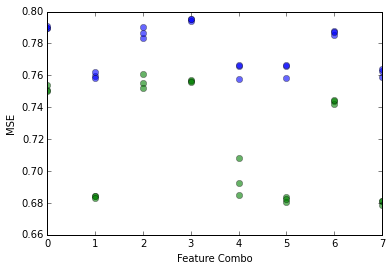

In [172]:
comp_mse_plot(mse_test_ob, mse_train_ob, k, n, 
              xlabel='Feature Combo', legend=False)

#Scratch Work

In [ ]:
feature_combos =[]
for i in range(k):
    feature_combos += list(combinations(item_features, i+1))
print feature_combos

for combo in feature_combos:
    print df_obs[list(combo)].columns


In [ ]:
n=3

m_ob = []
mse_test_ob = []
mse_train_ob = []
feature_combos =[]
for i in range(k):
    feature_combos += list(combinations(item_features, i+1))
k = len(feature_combos)

for i in range(n):
    (train_set, test_set) = sf_data.random_split(0.8)
    
#     #No observed item features for comparison
#     m_ob += [gl.ranking_factorization_recommender.create(train_set, 'User', 'Climb',
#                                                          target='rating',
#                                                          verbose = False,
#                                                          num_factors = 5)]
    #Iterate through each observed item feature
    for combo in feature_combos:
        df_ob = pd.concat( (df_obs.Climb, df_obs[list(combo)]) , axis=1)
        sf_ob = gl.SFrame(df_ob)
        m_ob += [model.create(train_set, 'User', 'Climb',
                                                            target='rating',
                                                            item_data = sf_ob,
                                                            verbose = False,
                                                            num_factors = 5)]
    
    mse_test_ob += [mod.evaluate_rmse(test_set, 'rating')['rmse_overall']
                  for mod in m_ob[i*k:]]
    mse_train_ob += [mod.evaluate_rmse(train_set, 'rating')['rmse_overall']
                  for mod in m_ob[i*k:]]
    

In [105]:
mod.recommend(k=1)

User,Climb,score,rank
11228,105725101,4.74451330536,1
108202763,105884815,5.02393003329,1
105821238,105756796,4.05516048364,1
11802,105756796,4.48097324959,1
106031999,106132213,4.69882563818,1
106058154,105741581,4.96220018168,1
106852393,105755821,4.84219462325,1
106830645,105741602,4.68126313401,1
13489,105732392,5.06272192887,1
108355917,105848762,4.78498498262,1


In [114]:
mod = gl.recommender.factorization_recommender.create(sf_data,
                                        user_id = 'User',
                                        item_id = 'Climb',
                                        target = 'rating',
                                        item_data = sf_item,
                                        num_factors=3
                    )

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 49132 observations with 699 users and 940 items.
PROGRESS:     Data prepared in: 0.0289s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 3        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 1e-08    |
PROGRESS: | solver                         | Solver used for training                         | adagrad  |
PROGRESS: | linear_regularization          | L2 Regularization on Linear Coefficients    

In [115]:
mod.recommend(k=1)

User,Climb,score,rank
11228,105874604,5.27031098313,1
108202763,105991865,5.3881917181,1
105821238,105933562,5.63555584278,1
11802,105863822,5.07267045351,1
106031999,105991865,5.33368701437,1
106058154,105741584,5.49658098193,1
106852393,105839153,5.91258815451,1
106830645,105867836,5.21955042426,1
13489,106225449,5.83584468216,1
108355917,105931493,5.8018954607,1


In [111]:
mod.evaluate_rmse(test_set, test_set['rating'])

RuntimeError: Runtime Exception. Column name rating does not exist.

In [113]:
sf_data

Climb,User,rating
105840361,11228,4
105840692,11228,5
105862944,11228,5
105898680,11228,3
105923367,11228,5
105973663,11228,4
105860641,11228,5
105722170,11228,4
105723454,11228,3
105722182,11228,4
